In [245]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import matplotlib
from scipy.sparse import coo_matrix
from sklearn.decomposition import TruncatedSVD, NMF, SparsePCA
from scipy.sparse.linalg import svds
from sklearn.metrics import roc_curve, accuracy_score , roc_auc_score

%matplotlib inline

In [241]:
# data_size = no. of output labels tobe generated
# thresh = user defined threshold for classification
# left_mat = it is the left matrix in matrix multiplication

def generate_test_label(thresh,data_size,test_sender_address, test_receiver_address, left_mat, right_mat):
    
    label_out_prob = np.zeros((data_size,))
    label_out_class = np.zeros((data_size,))
    
    for i in range(data_size):
        label_out_prob[i] = np.dot(left_mat[test_sender_address[i],:], right_mat[:,test_receiver_addr[i]]) 
        
    
    label_out_prob = label_out_prob/np.sum(label_out_prob)  # scale the values to between 0 and 1 to signify probabilitites
    label_out_class = (label_out_prob > thresh)
    return(label_out_class, label_out_prob)
        

In [105]:
raw_data = np.genfromtxt('data/txTripletsCounts.py', dtype=int)  # read the raw input training data

sender_addr= raw_data[:,0]
receiver_addr= raw_data[:,1]
connection_strength = raw_data[:,2]

In [248]:
fh = open('data/txTripletsCounts.py','rb')        # open the training data file to plot the graph

In [249]:
graph = nx.read_weighted_edgelist(fh, create_using= nx.DiGraph(), delimiter=' ')

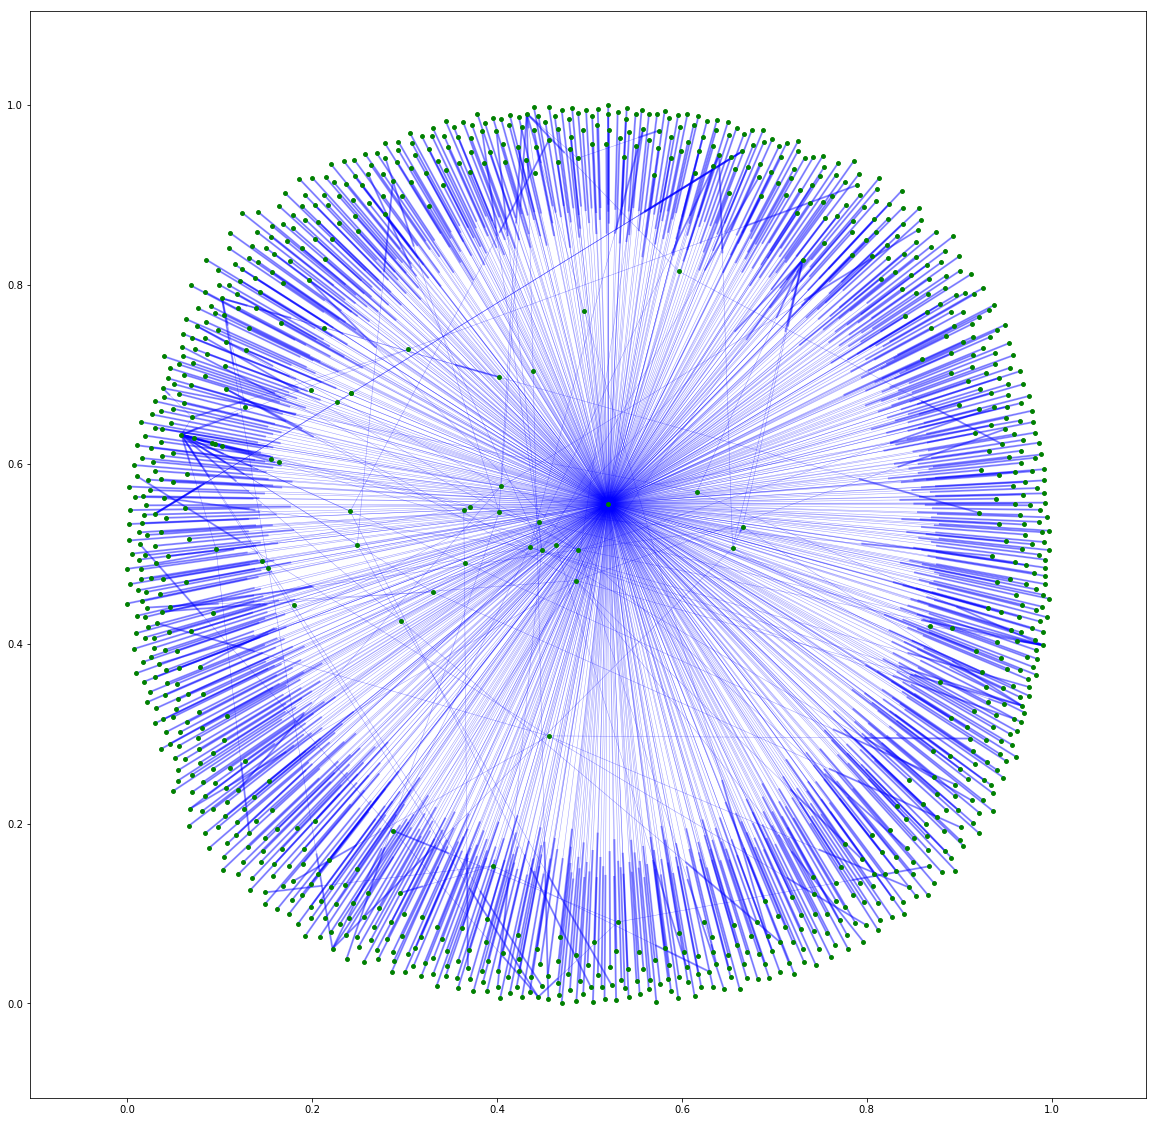

In [49]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, pos, node_color='g', node_shape='o', node_size=15)
nx.draw_networkx_edges(graph, pos, edge_color='b',edge_cmap=plt.cm.Blues, width=0.5, alpha=0.4)
plt.show()

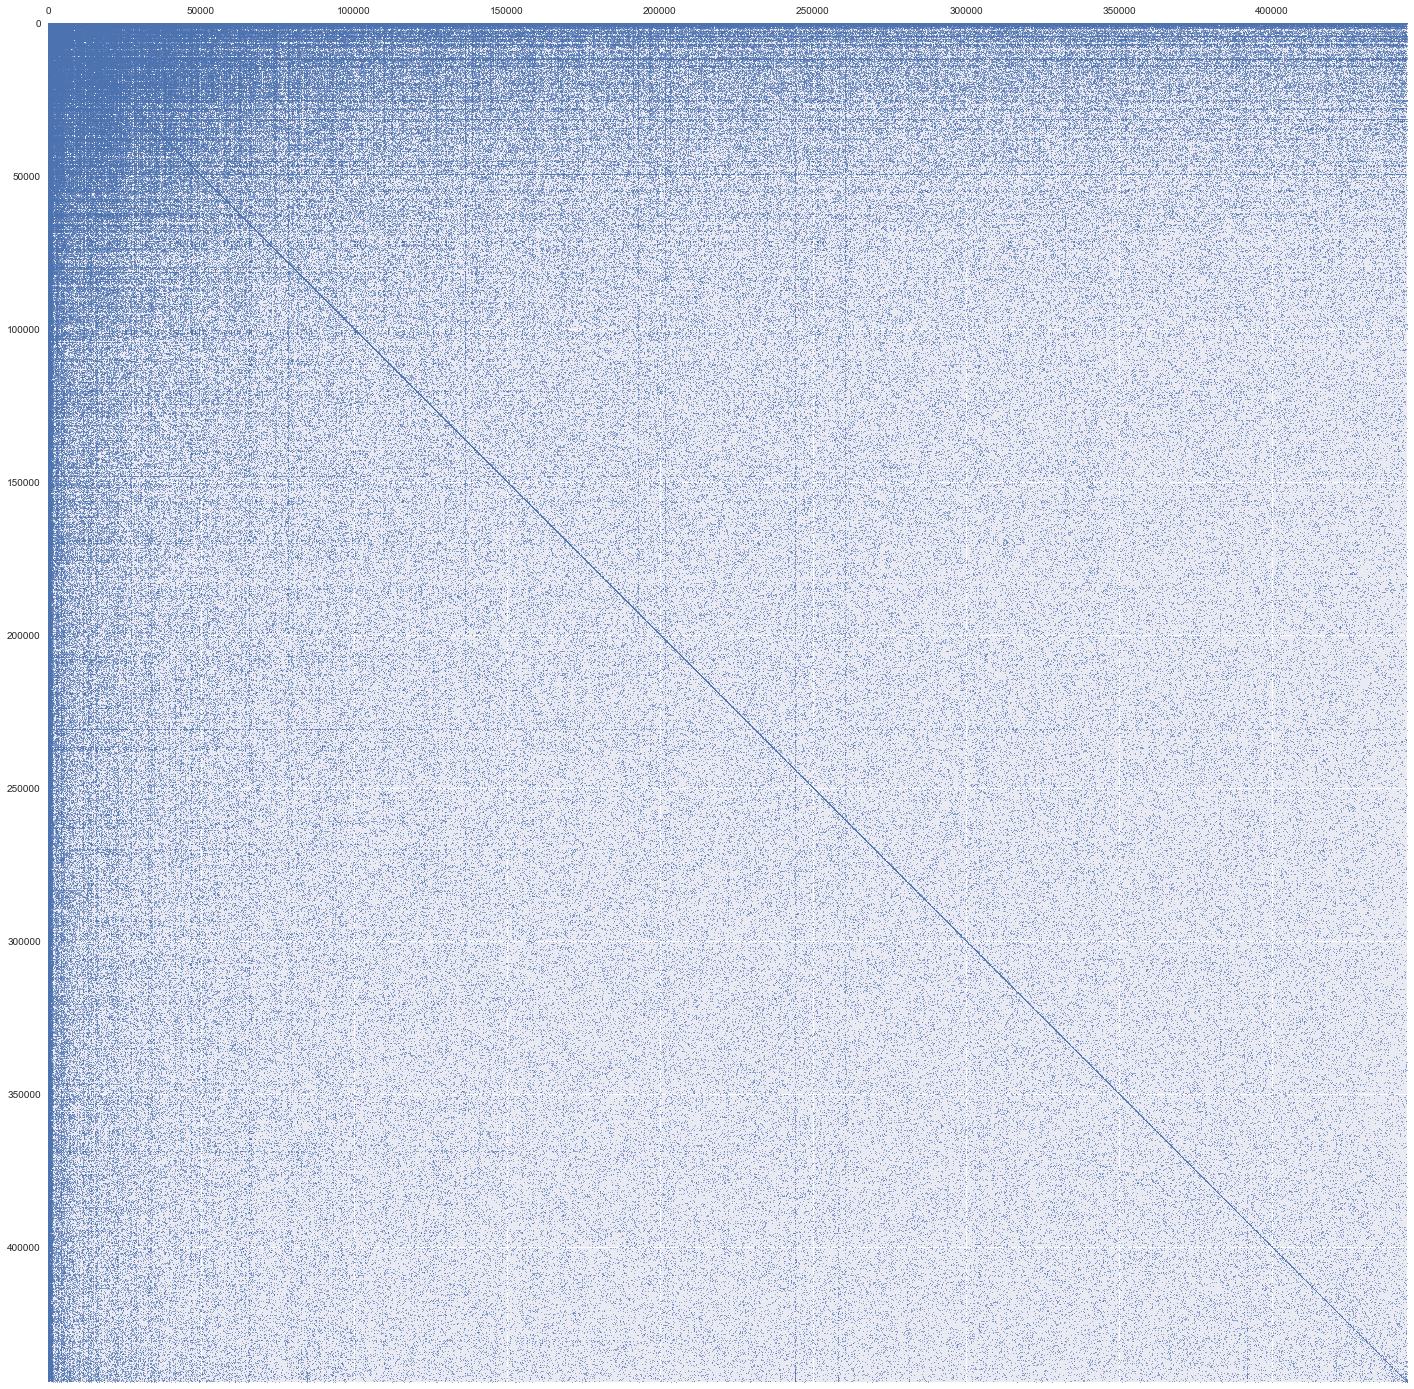

In [252]:
# Plot the sparsity matrix

adj_matrix = coo_matrix((connection_strength,(sender_addr,receiver_addr)), shape=(444075,444075),dtype=float)  # sparse adjacency matrix
plt.figure(figsize=(25,25))
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)

plt.spy(adj_matrix, markersize=0.6,precision=0.01)
plt.show()

# SVD Analysis: 

In [155]:
# SVD based matrix completion:

u,s,v = svds(f, k=20)       # take the largest 20 singular values
S= np.diag(s)               # dia   gonal matrix of singular values
inter_product = np.dot(S,v)  # intermediate product of S and V matrices

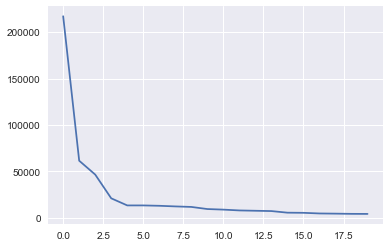

In [147]:
plt.plot(s[::-1])            # plot the top 20 singular values

In [160]:
# Read the test data:

raw_test_data = np.genfromtxt('data/testTriplets.py', dtype=int)
test_sender_addr = raw_test_data[:,0]
test_receiver_addr = raw_test_data[:,1]
test_label = raw_test_data[:,2]

m,n = raw_test_data.shape


In [242]:
# Prediction on the basis of SVD:

thresh_svd= 1e-8      # user specified threshold for prediction

# pred_label_class = a binary value for whether transaction occured or not
# pred_label_prob = actual probability of transaction 

pred_label_class_svd, pred_label_prob_svd = generate_test_label(thresh_svd,m, test_sender_addr, test_receiver_addr, u, inter_product)
    

In [227]:
fpr_svd, tpr_svd, thresholds_svd= roc_curve(test_label,pred_label_prob_svd)  # check the ROC characteristic of SVD analysis

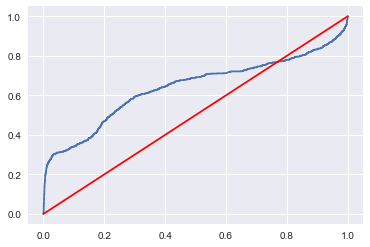

0.838


In [228]:
plt.plot(fpr_svd,tpr_svd)
plt.plot([0,1],[0,1],'r')
plt.show()


acc_svd = accuracy_score(test_label, pred_label_class_svd)
print(acc_svd)


## Non-negative Matrix Factorization:

In [244]:
nmf_model = NMF(n_components=10)
W = nmf_model.fit_transform(f)     # W & H marices with reduced dimensionality
H = nmf_model.components_
    

In [234]:
thresh_nmf= 1e-8      # user specified threshold for prediction

pred_label_class_nmf, pred_label_prob_nmf = generate_test_label(thresh_nmf,m, test_sender_addr, test_receiver_addr, W, H)


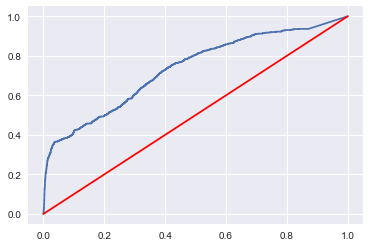

0.8696


In [235]:
fpr_nmf, tpr_nmf, thresholds_nmf= roc_curve(test_label,pred_label_prob_nmf)  # check the ROC characteristic of NMF analysis

plt.plot(fpr_nmf,tpr_nmf)
plt.plot([0,1],[0,1],'r')
plt.show()


acc_nmf = accuracy_score(test_label, pred_label_class_nmf)
print(acc_nmf)